In [1]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.append("../")
from utils import resample_data


# MNR Data set

## Read the processed sensor data from csv

In [2]:
MNR_data_path = "../../Data Processed/MNR Processed/"
MNR_resampled_path = os.path.join(MNR_data_path, "30S Resampled")
MNR_sensor_data_resampled_raw = pd.read_csv(os.path.join(MNR_resampled_path, "MNR_sensor_data_resampled_raw.csv"))
MNR_sensor_data_resampled_processed = pd.read_csv(os.path.join(MNR_resampled_path, "MNR_sensor_data_resampled_processed.csv"))
MNR_sensor_data_resampled_labels = pd.read_csv(os.path.join(MNR_resampled_path, "MNR_sensor_data_resampled_labels.csv"))

In [3]:
MNR_sensor_data_resampled_processed.head()

,timestamp,hum,tem,uv,image,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
0,2020-02-28 07:48:55,62,27,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,2.771267
1,2020-02-28 07:49:07,62,28,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,2.738353
2,2020-02-28 07:49:30,61,27,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,2.683521
3,2020-02-28 07:50:15,65,28,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,2.586430
4,2020-02-28 07:50:34,68,28,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,2.539494


In [4]:
MNR_sensor_data_resampled_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0,90,172,5,35,0,7,211.545546,4
1,0,0,92,176,5,35,0,7,213.507508,4
2,0,0,92,176,5,34,0,7,213.507508,4
3,0,0,90,176,5,34,0,7,213.507508,4
4,0,0,90,176,5,37,0,7,213.507508,4


## Read the merged data without image features from csv

In [5]:
MNR_merged_data_no_image_raw = pd.read_csv(os.path.join(MNR_data_path, "MNR_merged_data_no_image_raw.csv"))
MNR_merged_data_no_image_processed = pd.read_csv(os.path.join(MNR_data_path, "MNR_merged_data_no_image_processed.csv"))
MNR_merged_data_no_image_labels = pd.read_csv(os.path.join(MNR_data_path, "MNR_merged_data_no_image_labels.csv"))

In [6]:
MNR_merged_data_no_image_processed.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
0,2020-02-28 07:53:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851237.jpg,3.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,82.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,2.623831
1,2020-02-28 07:58:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851567.jpg,5.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,79.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.307241
2,2020-02-28 08:02:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852124.jpg,2.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,81.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,2.307241
3,2020-02-28 08:13:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852513.jpg,2.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,82.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,4.198610
4,2020-02-28 08:17:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852742.jpg,5.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,80.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,4.198610


In [7]:
MNR_merged_data_no_image_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0.0,62.0,132.0,4.0,29.0,0,7.0,184.978102,3
1,0,0.0,72.0,148.0,4.0,27.0,0,8.0,193.153285,3
2,0,0.0,72.0,148.0,4.0,28.0,0,8.0,193.153285,3
3,0,0.0,62.0,132.0,5.0,31.0,0,8.0,184.978102,3
4,0,0.0,64.0,132.0,4.0,26.0,0,8.0,184.978102,3


## Read the merged data with image features from csv

In [8]:
model_folder = "ssd_resnet152_v1_fpn_1024x1024_coco17_tpu-8" #or efficientdet_d7_coco17_tpu-32

MNR_merged_data_raw = pd.read_csv(os.path.join(MNR_data_path, model_folder, "MNR_merged_data_raw.csv"))
MNR_merged_data_processed = pd.read_csv(os.path.join(MNR_data_path, model_folder, "MNR_merged_data_processed.csv"))
MNR_merged_data_labels = pd.read_csv(os.path.join(MNR_data_path, model_folder, "MNR_merged_data_labels.csv"))

In [9]:
MNR_merged_data_processed.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,...,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
0,2020-02-28 07:53:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851237.jpg,3.0,3.0,4.0,3.0,2.0,3.0,3.0,...,0.0,0.0,1.0,0.0,1.0,2.623831,14,11,3,67.389644
1,2020-02-28 07:58:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582851567.jpg,5.0,4.0,3.0,3.0,2.0,3.0,4.0,...,0.0,0.0,1.0,0.0,1.0,2.307241,8,7,3,56.081927
2,2020-02-28 08:02:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852124.jpg,2.0,4.0,3.0,3.0,4.0,3.0,3.0,...,0.0,0.0,1.0,0.0,1.0,2.307241,15,8,1,69.403899
3,2020-02-28 08:13:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852513.jpg,2.0,3.0,4.0,3.0,3.0,3.0,3.0,...,0.0,0.0,1.0,0.0,1.0,4.198610,8,5,0,82.516990
4,2020-02-28 08:17:00,..\..\Data\Data HCM\_MNR_SENSOR_DATA_\emotion_...,22646-44678-1582852742.jpg,5.0,5.0,3.0,3.0,4.0,4.0,4.0,...,0.0,0.0,1.0,0.0,1.0,4.198610,3,2,0,64.668396


In [10]:
MNR_merged_data_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0.0,62.0,132.0,4.0,29.0,0,7.0,184.978102,3
1,0,0.0,72.0,148.0,4.0,27.0,0,8.0,193.153285,3
2,0,0.0,72.0,148.0,4.0,28.0,0,8.0,193.153285,3
3,0,0.0,62.0,132.0,5.0,31.0,0,8.0,184.978102,3
4,0,0.0,64.0,132.0,4.0,26.0,0,8.0,184.978102,3


## Statistical Analysis

In [11]:
# Basic statistics
# Sensor data resampled, use the processed one
MNR_sensor_data_resampled_processed.describe()

,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
count,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000
mean,76.076011,32.608963,0.061072,0.230668,0.365554,0.403779,0.267135,0.732865,3.580512
std,14.650955,3.763210,0.244959,0.421353,0.481691,0.490762,0.442561,0.442561,0.995979
min,29.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.173340
25%,68.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.562300
50%,76.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.476783
75%,87.000000,34.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.578840
max,99.000000,45.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.232962


In [12]:
MNR_sensor_data_resampled_labels.describe()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
count,2276.0,2276.0,2276.000000,2276.000000,2276.000000,2276.000000,2276.0,2276.000000,2276.000000,2276.000000
mean,0.0,0.0,62.598418,123.130053,4.917838,21.845782,0.0,8.554482,181.461533,3.114675
std,0.0,0.0,23.392729,35.840265,2.070370,5.501124,0.0,0.875615,22.805859,0.454075
min,0.0,0.0,30.000000,36.000000,2.000000,10.000000,0.0,6.000000,89.333333,1.000000
25%,0.0,0.0,50.000000,108.000000,4.000000,18.000000,0.0,8.000000,172.715328,3.000000
50%,0.0,0.0,62.000000,124.000000,4.000000,21.000000,0.0,8.000000,180.890511,3.000000
75%,0.0,0.0,72.000000,140.000000,6.000000,25.000000,0.0,9.000000,189.065693,3.000000
max,0.0,0.0,342.000000,380.000000,15.000000,65.000000,0.0,10.000000,410.643095,5.000000


## Plotting statistics for Sensor data resampled

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=20, 20

In [14]:
# Combine labels with data
MNR_sensor_data_resampled_processed_combine = pd.concat([MNR_sensor_data_resampled_processed, MNR_sensor_data_resampled_labels], axis=1)

In [15]:
MNR_sensor_data_resampled_processed_combine.isnull().sum()

timestamp                0
hum                      0
tem                      0
uv                       0
image                    0
part_of_day_Afternoon    0
part_of_day_Evening      0
part_of_day_Morning      0
Not rush hour            0
Rush hour                0
distance_to_airport      0
o3_8                     0
o3                       0
pm10                     0
pm25                     0
co                       0
so2                      0
so2_24                   0
no2                      0
aqi                      0
aqi_rank                 0
dtype: int64

In [16]:
MNR_sensor_data_resampled_processed_combine.head()

,timestamp,hum,tem,uv,image,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,...,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,2020-02-28 07:48:55,62,27,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,...,0,0,90,172,5,35,0,7,211.545546,4
1,2020-02-28 07:49:07,62,28,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,...,0,0,92,176,5,35,0,7,213.507508,4
2,2020-02-28 07:49:30,61,27,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,...,0,0,92,176,5,34,0,7,213.507508,4
3,2020-02-28 07:50:15,65,28,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,...,0,0,90,176,5,34,0,7,213.507508,4
4,2020-02-28 07:50:34,68,28,0,20200228_121403A_snap.jpg,0.0,0.0,1.0,0.0,1.0,...,0,0,90,176,5,37,0,7,213.507508,4


In [17]:
# Compute the correlation between our features with aqi values and aqi ranks
# First need to drop unecessary columns
# Here we remove all columns that we are not used as features in the models
MNR_sensor_data_resampled_processed_combine_drop = MNR_sensor_data_resampled_processed_combine.drop(columns=\
                                                                                                    ["timestamp", "image", "o3_8", "o3", "pm10", \
                                                                                                     "pm25", "co", "so2", "so2_24", "no2"])
aqi_values = MNR_sensor_data_resampled_processed_combine_drop[["aqi"]]
aqi_ranks = MNR_sensor_data_resampled_processed_combine_drop[["aqi_rank"]]

corr_matrix = MNR_sensor_data_resampled_processed_combine_drop.corr()

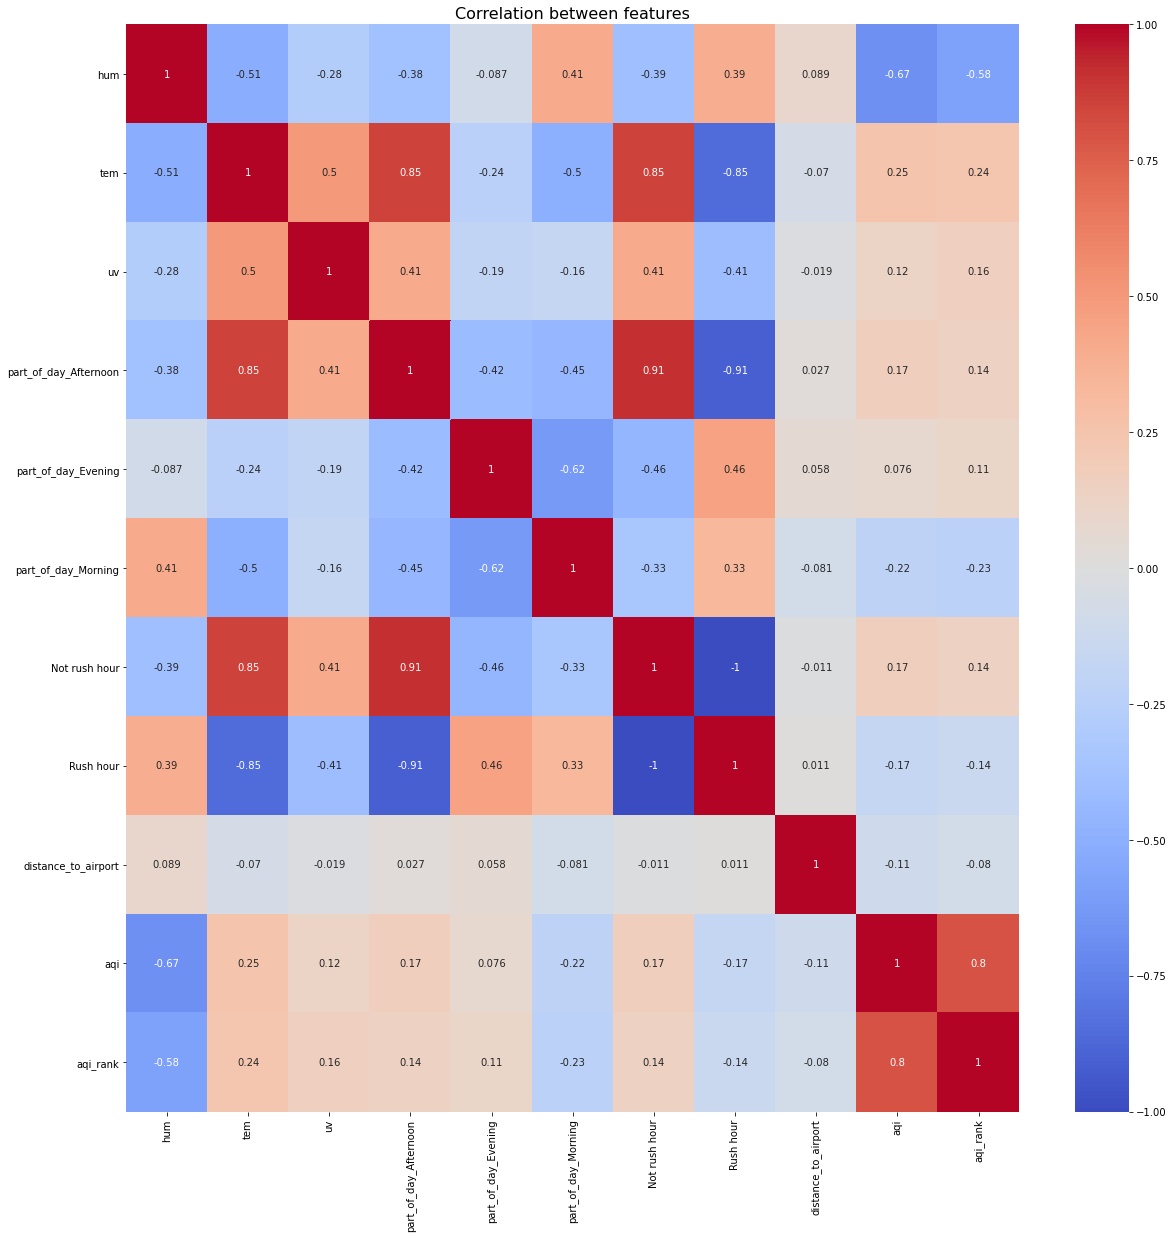

In [18]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between features', fontsize=16)
plt.show()

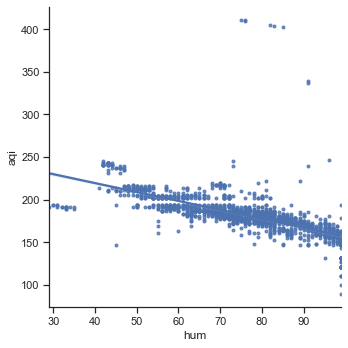

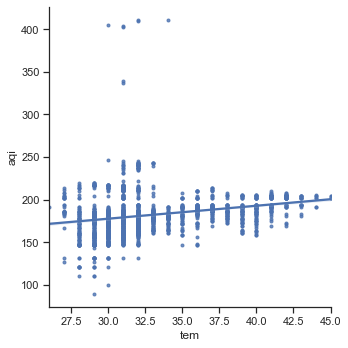

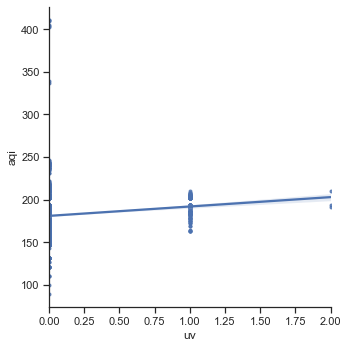

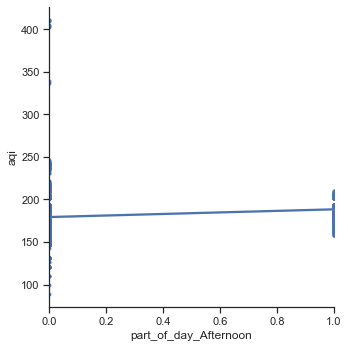

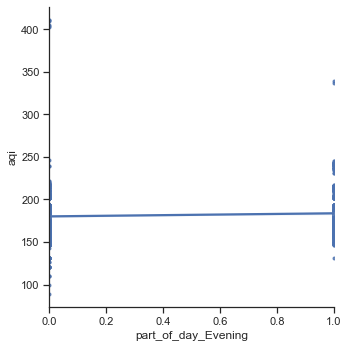

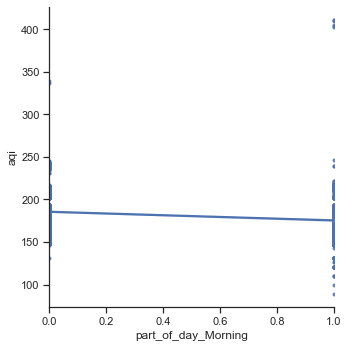

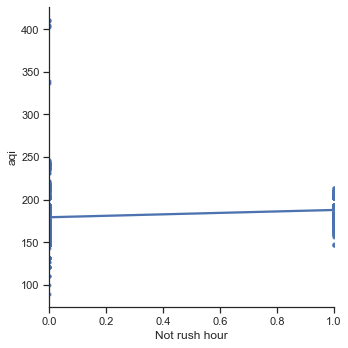

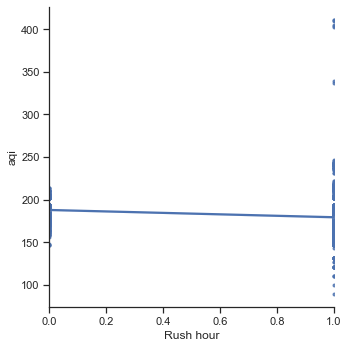

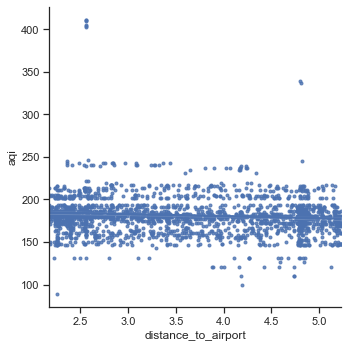

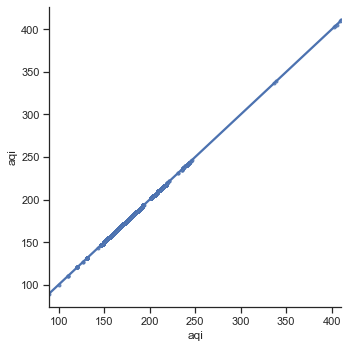

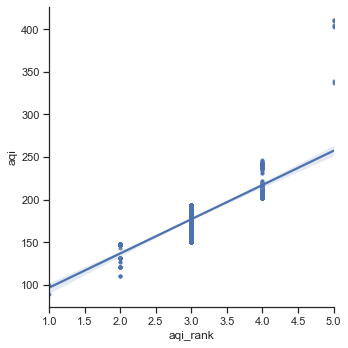

In [19]:
# Visualize linear relationships between each feature and AQI values
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    sns.lmplot(x=i, y='aqi', data = MNR_sensor_data_resampled_processed_combine_drop, markers='.')

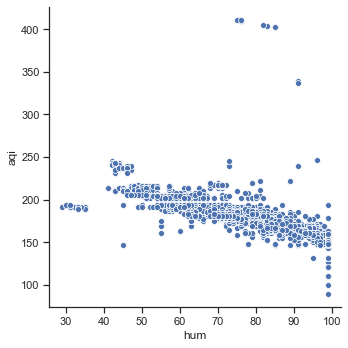

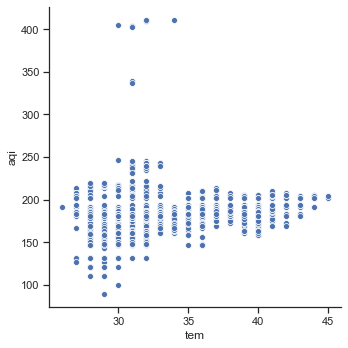

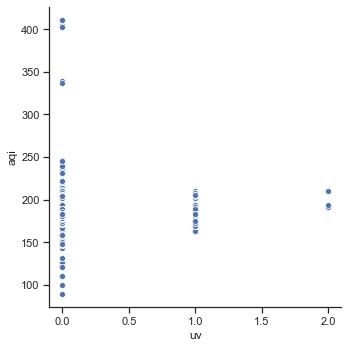

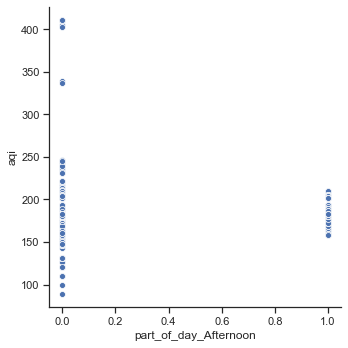

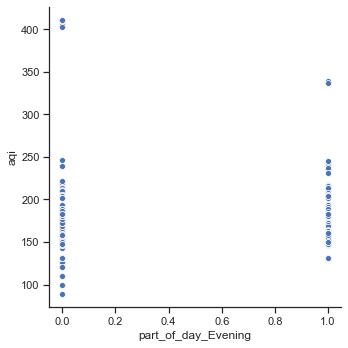

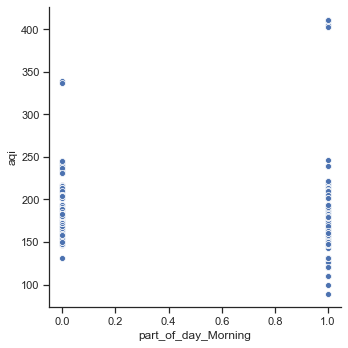

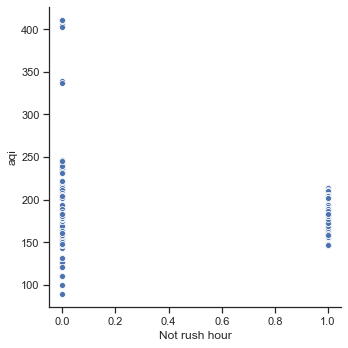

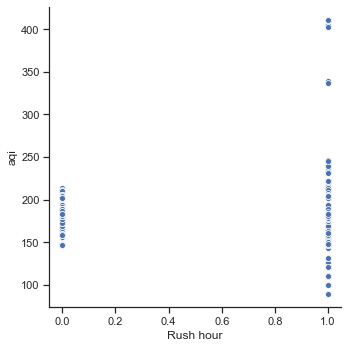

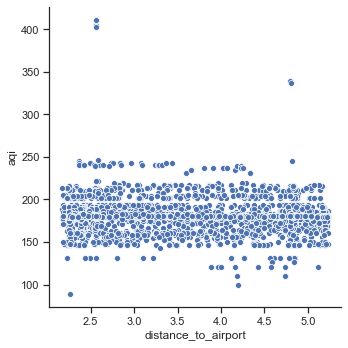

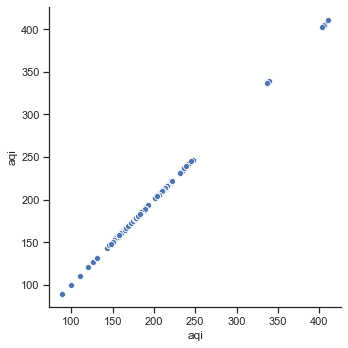

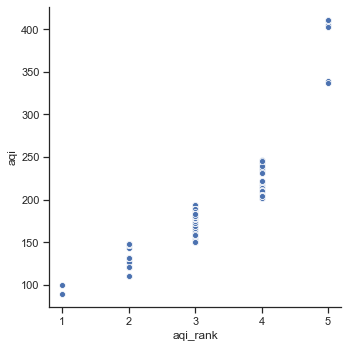

In [20]:
# Visualize relating variables to aqi values
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    sns.relplot(x=i, y='aqi', data = MNR_sensor_data_resampled_processed_combine_drop)

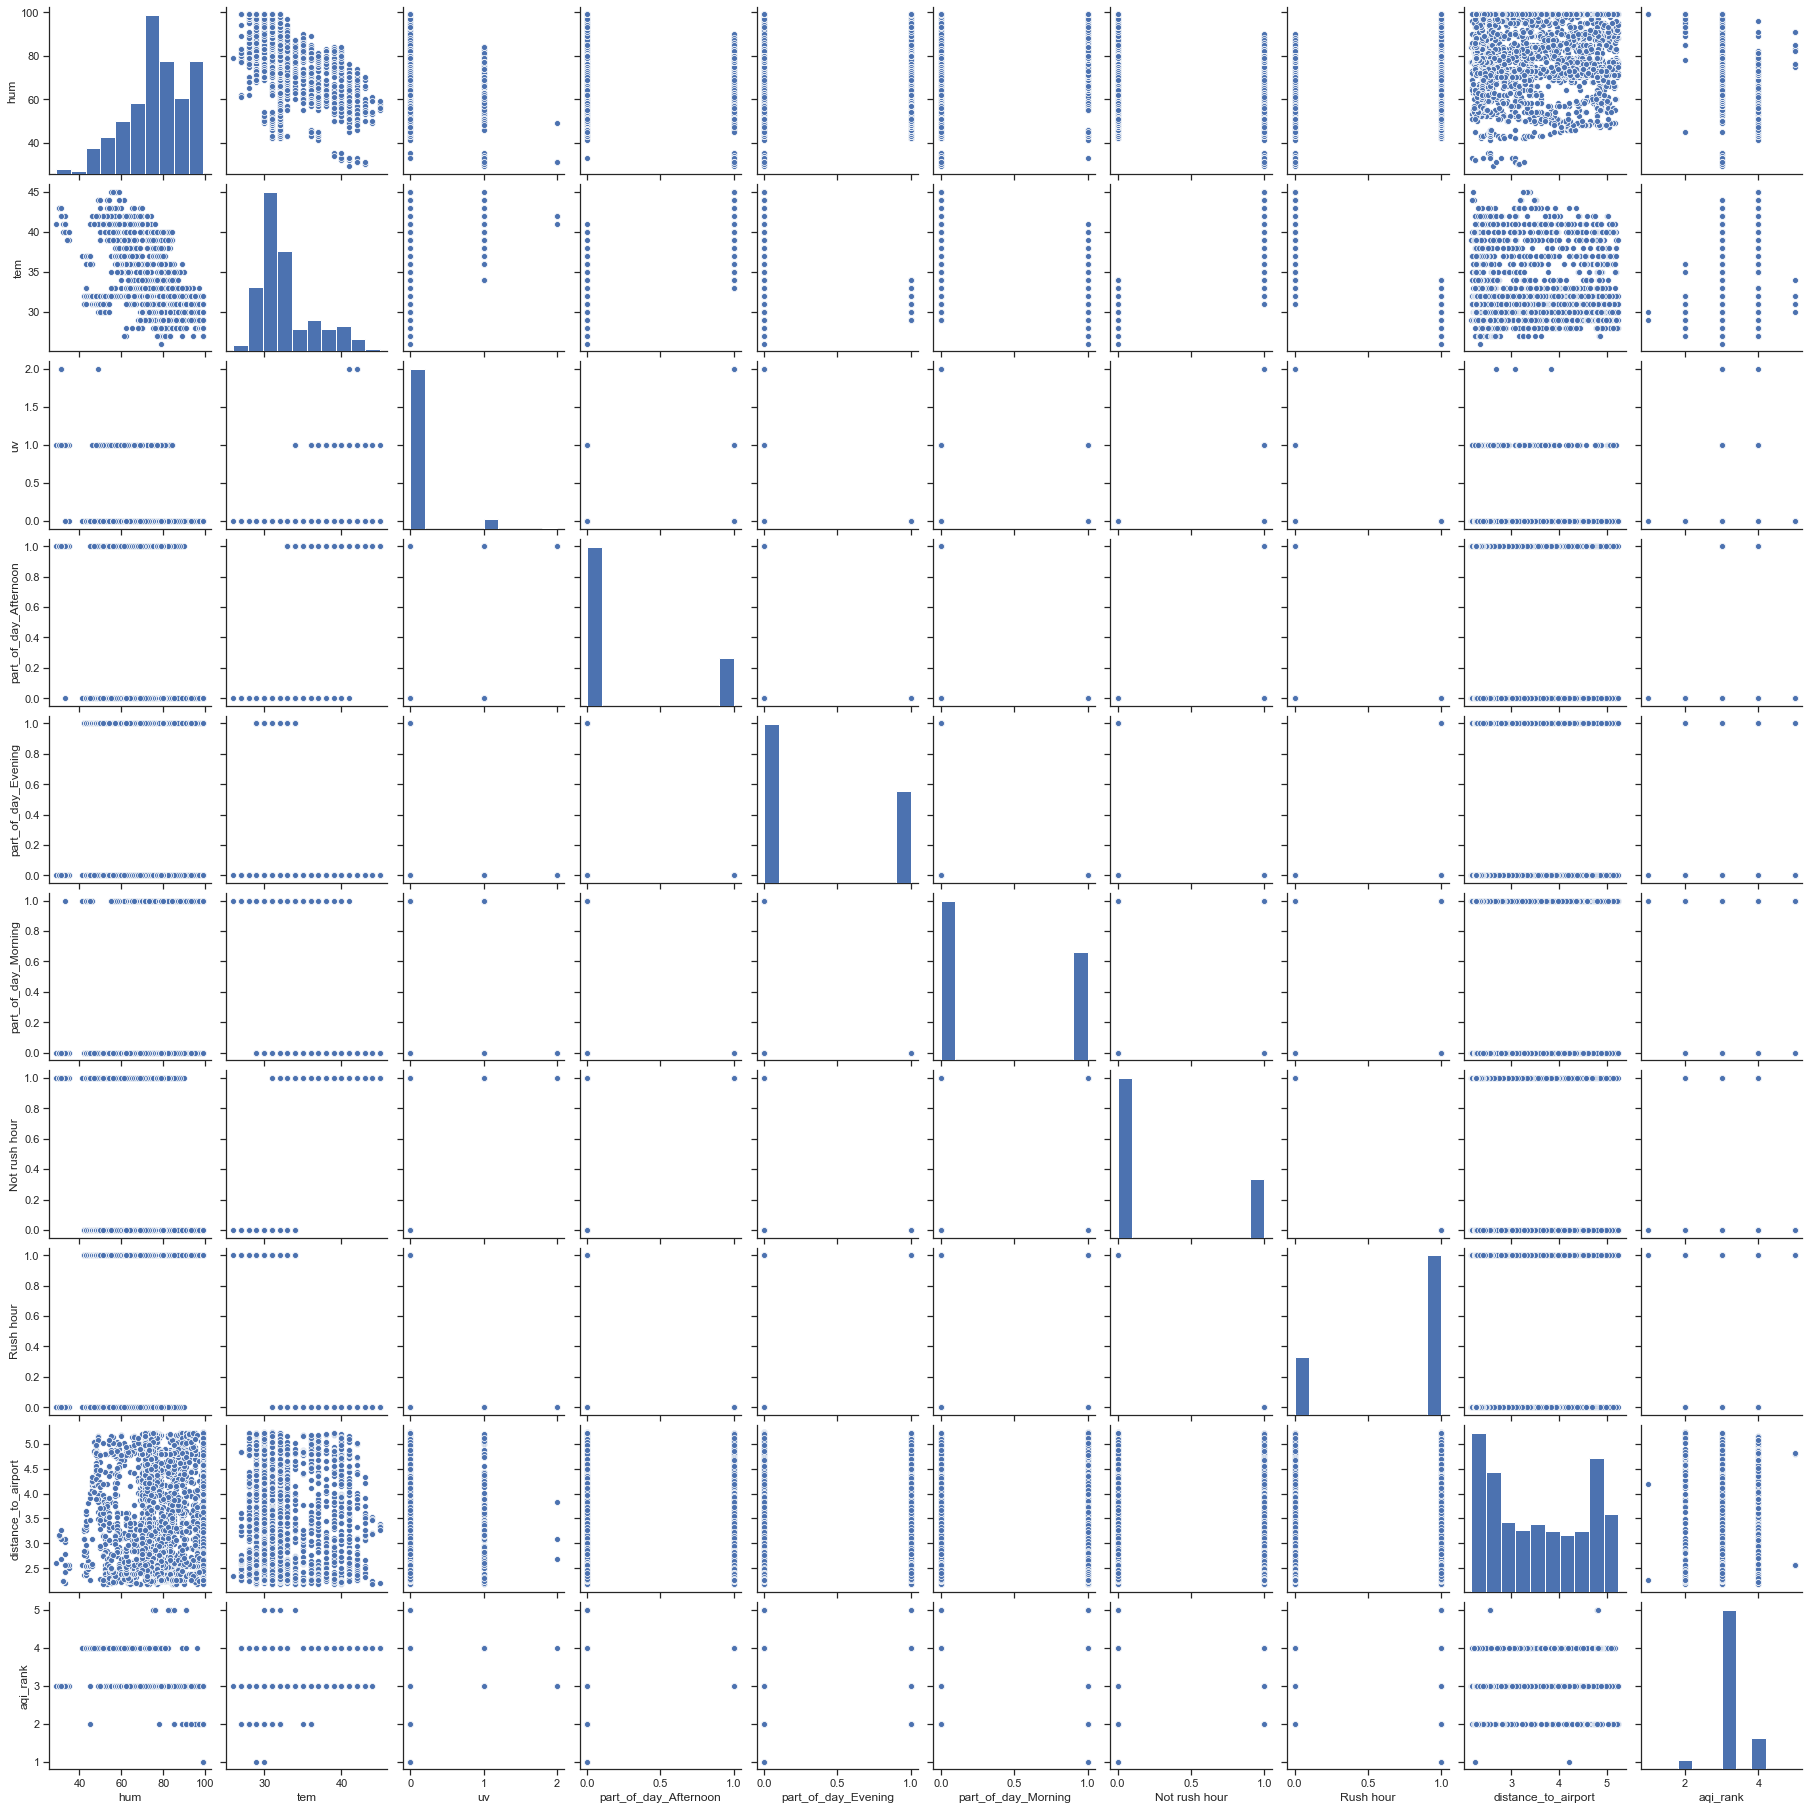

In [21]:
# Pairwise bivariate distribution
rcParams['figure.figsize']=30, 30
sns.pairplot(MNR_sensor_data_resampled_processed_combine_drop.drop(columns=["aqi"]))

In [22]:
# Do the same for aqi ranks of sensor data

## Plotting Statistics for Merged data processed

In [23]:
# Do same for aqi values and ranks